**IMPORTING NECESSARY LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***IMPORTING THE DATASET ***

In [2]:
file_id = '19omKVCJ1sEvlw1ZmSpyNi-SZS2YZuHme'
file_url = f'https://drive.google.com/uc?id={file_id}'
data = pd.read_csv(file_url)

In [3]:
data

,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,Aaban,M,topamax,41.0,White,Mild Side Effects
1,Aaban,M,zocor,53.0,"Hispanic, White",Extremely Severe Side Effects
2,Aabha,F,tazorac,31.0,White,Mild Side Effects
3,Aabha,F,voltaren,44.0,White,Severe Side Effects
4,Aabid,M,tramadol,24.0,White,No Side Effects
...,...,...,...,...,...,...
399995,TRUE,M,lamisil,50.0,White,Severe Side Effects
399996,TRUE,M,klaron,55.0,"Hispanic, White",No Side Effects
399997,TRUE,M,celexa,57.0,Other,Severe Side Effects
399998,TRUE,F,zoloft,59.0,White,No Side Effects


**BASIC EDA**

In [4]:
data.head()

,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,Aaban,M,topamax,41.0,White,Mild Side Effects
1,Aaban,M,zocor,53.0,"Hispanic, White",Extremely Severe Side Effects
2,Aabha,F,tazorac,31.0,White,Mild Side Effects
3,Aabha,F,voltaren,44.0,White,Severe Side Effects
4,Aabid,M,tramadol,24.0,White,No Side Effects


In [5]:
data.shape

(400000, 6)

In [6]:
data.columns

Index(['NAME', 'GENDER', 'DRUG NAME', 'AGE', 'RACE', 'SIDE EFFECTS'], dtype='object')

In [7]:
data.duplicated().value_counts()

False    398208
True       1792
dtype: int64

In [8]:
# Use the drop_duplicates method to remove duplicate rows
data = data.drop_duplicates()

In [9]:
data.shape

(398208, 6)

In [10]:
data['NAME'].nunique()

133911

In [11]:
data['GENDER'].nunique()

2

In [12]:
data['DRUG NAME'].nunique()

502

In [13]:
data['AGE'].nunique()

80

In [14]:
data['RACE'].nunique()

9

In [15]:
data['SIDE EFFECTS'].nunique()

5

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398208 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   NAME          398208 non-null  object 
 1   GENDER        398208 non-null  object 
 2   DRUG NAME     398208 non-null  object 
 3   AGE           398188 non-null  float64
 4   RACE          398208 non-null  object 
 5   SIDE EFFECTS  398208 non-null  object 
dtypes: float64(1), object(5)
memory usage: 21.3+ MB


In [17]:
data.dtypes

NAME             object
GENDER           object
DRUG NAME        object
AGE             float64
RACE             object
SIDE EFFECTS     object
dtype: object

In [18]:
data.describe()

,AGE
count,398188.000000
mean,41.466430
std,12.550886
min,14.000000
25%,31.000000
50%,41.000000
75%,51.000000
max,600.000000


In [19]:
data['NAME'].unique()

array(['Aaban', 'Aabha', 'Aabid', ..., 'Zyyon', 'Zzyzx', 'TRUE'],
      dtype=object)

In [20]:
data['GENDER'].unique()

array(['M', 'F'], dtype=object)

In [21]:
data['DRUG NAME'].unique()

array(['topamax', 'zocor', 'tazorac', 'voltaren', 'tramadol', 'valtrex',
       'levoxyl', 'imitrex', 'seroquel', 'minocycline', 'proscar',
       'keflex', 'cataflam', 'zyrtec', 'lexapro', 'spironolactone',
       'claripel-cream', 'wellbutrin-sr', 'prozac', 'wellbutrin-xl',
       'citalopram', 'baclofen', 'concerta', 'singulair', 'angeliq',
       'yasmin', 'cialis', 'lunesta', 'cymbalta', 'methotrexate',
       'lamictal', 'evoclin', 'actonel', 'protonix', 'premarin',
       'provigil', 'protopic', 'prednisone', 'diazepam', 'ultram',
       'albuterol', 'zovirax', 'asacol', 'zegerid', 'halcion', 'differin',
       'nexium', 'phenergan', 'propecia', 'enalapril', 'chantix', 'avita',
       'synthroid', 'renova', 'buspar', 'retin-a-micro', 'climara',
       'estrace', 'klonopin', 'ambien', 'prevacid', 'lipitor',
       'wellbutrin', 'seasonique', 'paxil', 'nortriptyline', 'amoxil',
       'nitrofurantoin', 'tamiflu', 'noroxin', 'acyclovir', 'aromasin',
       'celebrex', 'claritin', '

In [22]:
data['RACE'].unique()

array(['White', 'Hispanic, White', 'Unknown', 'Black', 'Other',
       'Hispanic, Black', 'Asian, Other', 'Asian Indian', 'Chinese'],
      dtype=object)

In [23]:
data['AGE'].unique()

array([ 41.,  53.,  31.,  44.,  24.,  55.,  34.,  28.,  38.,  56.,  18.,
        35.,  50.,  52.,  62.,  42.,  23.,  40.,  22.,  32.,  39.,  51.,
        29.,  43.,  57.,  26.,  60.,  36.,  54.,  70.,  37.,  30.,  65.,
        47.,  33.,  58.,  25.,  49.,  46.,  48.,  59.,  71.,  63.,  45.,
        67.,  21.,  27.,  17.,  20.,  66.,  61.,  64.,  15.,  69.,  19.,
       300.,  73.,  68.,  72.,  74.,  75.,  14.,  nan, 302.,  87.,  90.,
        84.,  80., 500., 400., 203., 160., 191., 450., 390.,  77., 155.,
       600., 211., 401.,  89.])

In [24]:
data['SIDE EFFECTS'].unique()

array(['Mild Side Effects', 'Extremely Severe Side Effects',
       'Severe Side Effects', 'No Side Effects', 'Moderate Side Effects'],
      dtype=object)

**IDENTIFYING MISSING VALUES**

In [25]:
data.isna().sum()

NAME             0
GENDER           0
DRUG NAME        0
AGE             20
RACE             0
SIDE EFFECTS     0
dtype: int64

#There are missing values in the AGE.

## **EDA**

UNIVARIATE ANALYSIS

In [26]:
#NAME

In [27]:
#Drop the column "Name" which doesn't give any contribution for the modelling
data = data.drop(['NAME'], axis = 1)

In [28]:
data

,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,M,topamax,41.0,White,Mild Side Effects
1,M,zocor,53.0,"Hispanic, White",Extremely Severe Side Effects
2,F,tazorac,31.0,White,Mild Side Effects
3,F,voltaren,44.0,White,Severe Side Effects
4,M,tramadol,24.0,White,No Side Effects
...,...,...,...,...,...
399995,M,lamisil,50.0,White,Severe Side Effects
399996,M,klaron,55.0,"Hispanic, White",No Side Effects
399997,M,celexa,57.0,Other,Severe Side Effects
399998,F,zoloft,59.0,White,No Side Effects


In [29]:
#RACE

In [30]:
data['RACE'].value_counts()

White              312673
Hispanic, White     43870
Black               35693
Unknown              3032
Hispanic, Black      1658
Other                1002
Asian, Other          168
Asian Indian          104
Chinese                 8
Name: RACE, dtype: int64

In [31]:
data['RACE'].value_counts(normalize=True)

White              0.785200
Hispanic, White    0.110169
Black              0.089634
Unknown            0.007614
Hispanic, Black    0.004164
Other              0.002516
Asian, Other       0.000422
Asian Indian       0.000261
Chinese            0.000020
Name: RACE, dtype: float64

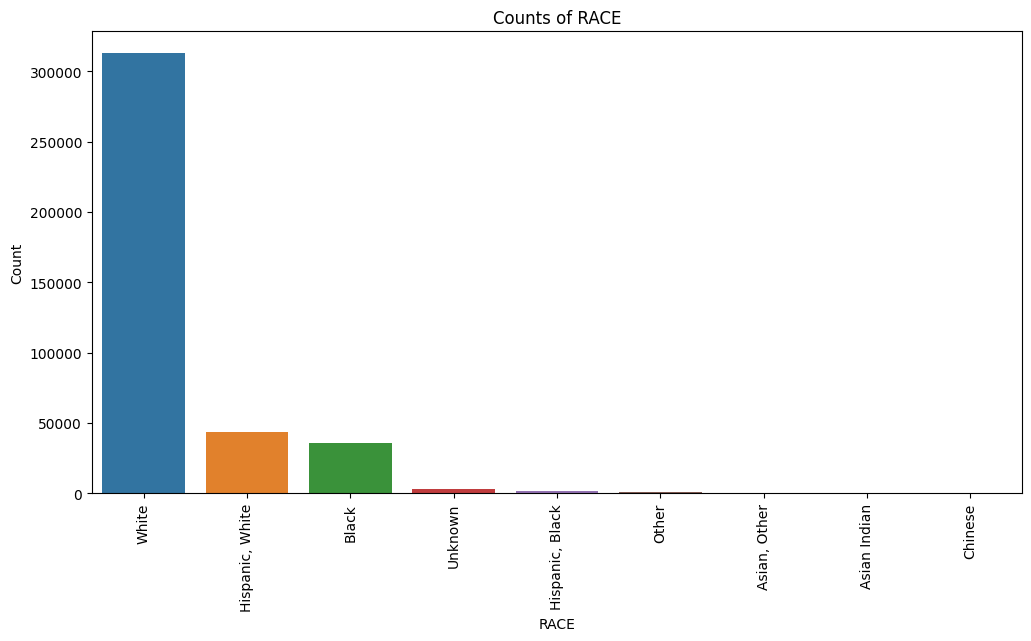

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(x='RACE', data=data, order=data['RACE'].value_counts().index)
plt.title('Counts of RACE')
plt.xlabel('RACE')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [33]:
#AMONG THE PATIENTS MAJORITY ARE WHITES AND CHINESE ARE MINORITY

In [34]:
#GENDER

In [35]:
data['GENDER'].value_counts()

F    236852
M    161356
Name: GENDER, dtype: int64

In [36]:
data['GENDER'].value_counts(normalize=True)

F    0.594795
M    0.405205
Name: GENDER, dtype: float64

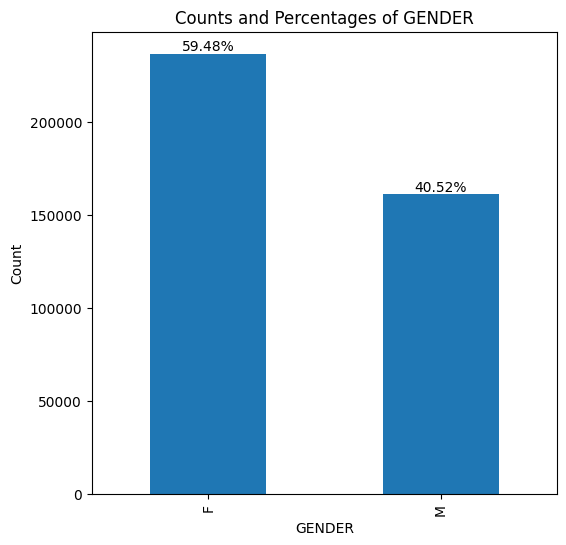

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'data' with a 'GENDER' column

# Get the value counts for each gender category
gender_counts = data['GENDER'].value_counts()

# Create a bar plot for gender
plt.figure(figsize=(6, 6))
ax = gender_counts.plot(kind='bar')

# Add percentage labels above the bars
total = gender_counts.sum()
for i, count in enumerate(gender_counts):
    percentage = (count / total) * 100
    plt.text(i, count, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=10)

plt.title('Counts and Percentages of GENDER')
plt.xlabel('GENDER')
plt.ylabel('Count')
plt.show()


In [38]:
#59.4% are females ,40.5% are males, FEMALES ARE MORE

In [39]:
#AGE

In [40]:
data['AGE'].min()

14.0

In [41]:
data['AGE'].max()

600.0

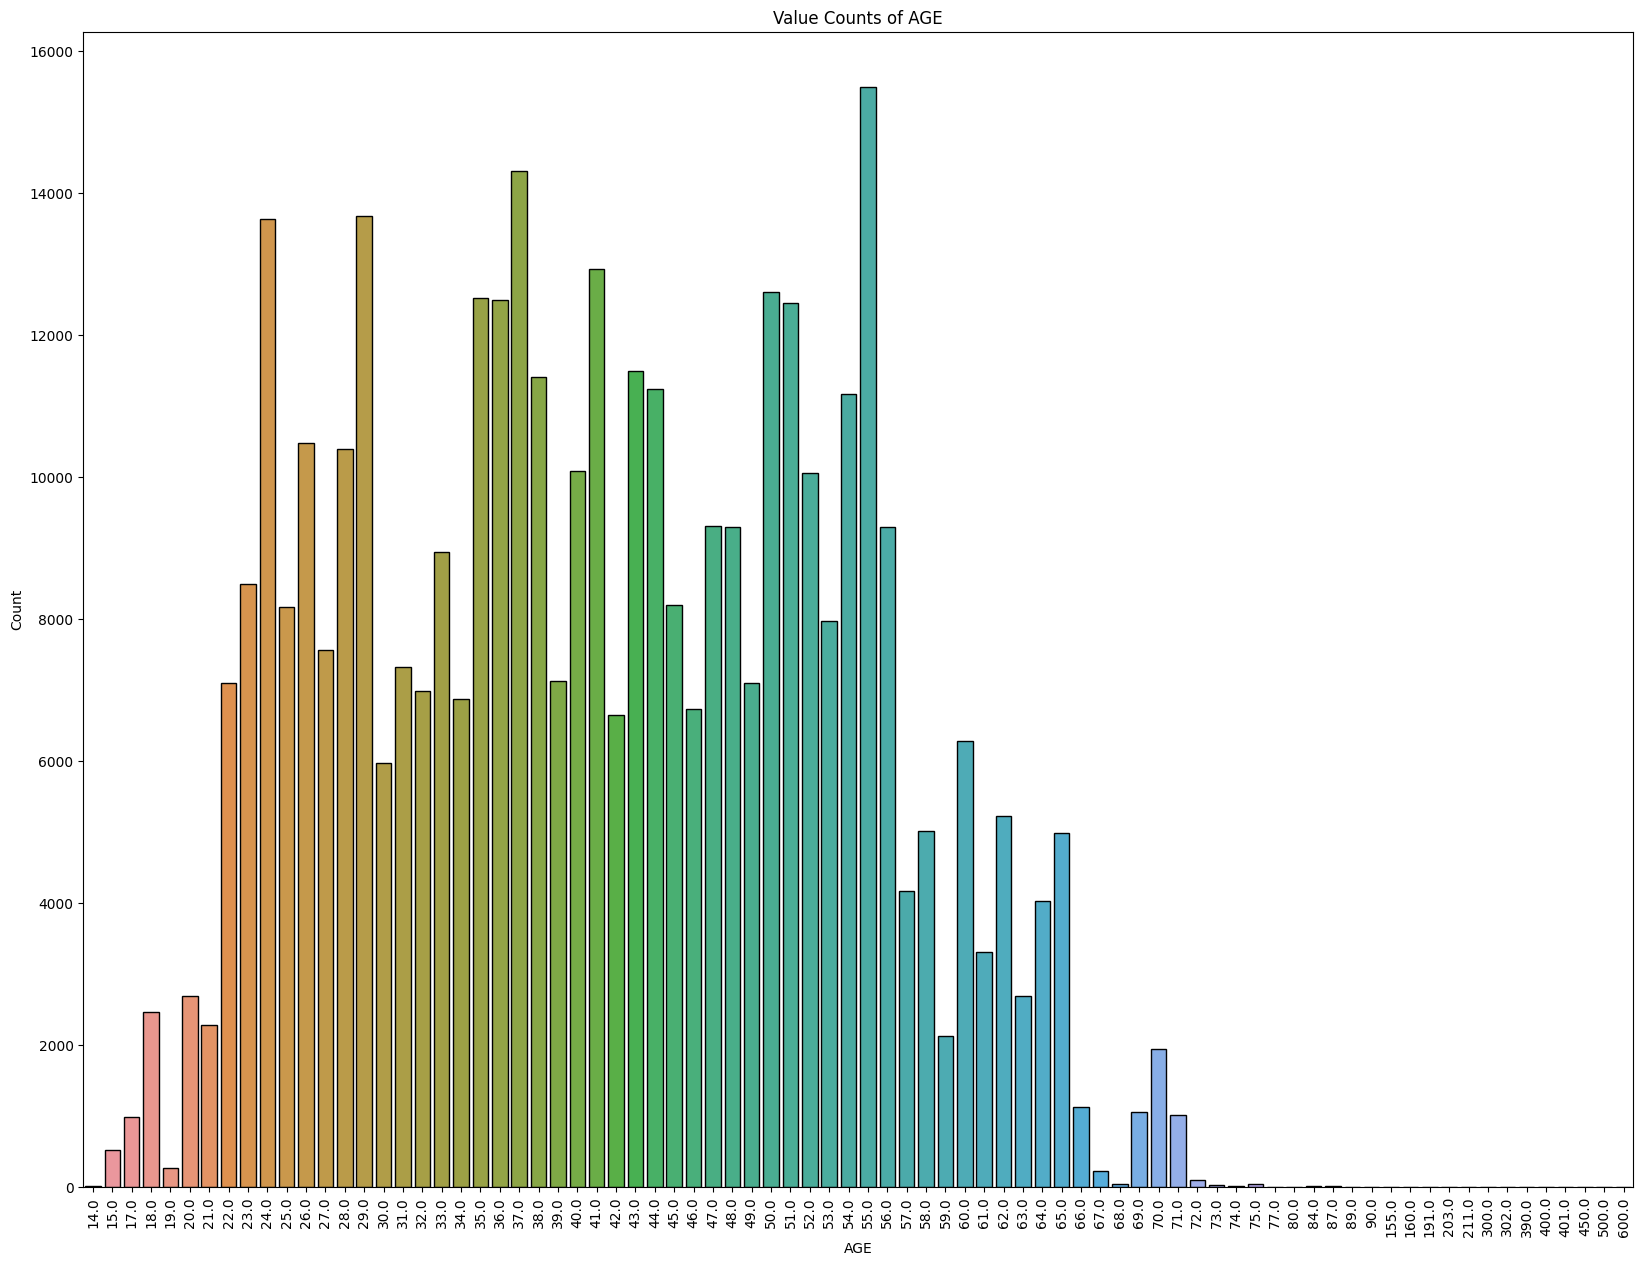

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing the 'AGE' column

# Calculate value counts for 'AGE'
age_counts = data['AGE'].value_counts().sort_index()

# Create a bar plot for the value counts of 'AGE' with dark black outlines
plt.figure(figsize=(20, 15))
sns.barplot(x=age_counts.index, y=age_counts.values, edgecolor='black')  # Add 'edgecolor'
plt.xlabel('AGE')
plt.ylabel('Count')
plt.title('Value Counts of AGE')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [43]:
pd.set_option('display.max_rows', None)

In [44]:
data['AGE'].value_counts()

55.0     15493
37.0     14307
29.0     13671
24.0     13640
41.0     12925
50.0     12599
35.0     12514
36.0     12488
51.0     12453
43.0     11496
38.0     11408
44.0     11237
54.0     11165
26.0     10481
28.0     10399
40.0     10079
52.0     10058
47.0      9304
56.0      9300
48.0      9289
33.0      8939
23.0      8486
45.0      8192
25.0      8165
53.0      7972
27.0      7567
31.0      7322
39.0      7130
22.0      7101
49.0      7100
32.0      6985
34.0      6872
46.0      6736
42.0      6648
60.0      6276
30.0      5977
62.0      5224
58.0      5020
65.0      4989
57.0      4175
64.0      4032
61.0      3308
63.0      2696
20.0      2683
18.0      2459
21.0      2282
59.0      2128
70.0      1945
66.0      1128
69.0      1056
71.0      1017
17.0       986
15.0       516
19.0       272
67.0       218
72.0        96
75.0        48
68.0        48
73.0        32
87.0         9
74.0         8
84.0         8
14.0         8
300.0        3
390.0        3
600.0        2
400.0     

In [45]:
# AGE IS A SKEWED DISTRIBUTION ,AND MAJORITY PATIENTS ARE IN THE AGE GROUP OF 24-55.

In [46]:
#SIDE EFFECTS

In [47]:
data['SIDE EFFECTS'].value_counts()

Mild Side Effects                132667
No Side Effects                  115247
Moderate Side Effects             74166
Severe Side Effects               53194
Extremely Severe Side Effects     22934
Name: SIDE EFFECTS, dtype: int64

In [48]:
data['SIDE EFFECTS'].value_counts(normalize=True)    #IMBALANCED DATA

Mild Side Effects                0.333160
No Side Effects                  0.289414
Moderate Side Effects            0.186249
Severe Side Effects              0.133583
Extremely Severe Side Effects    0.057593
Name: SIDE EFFECTS, dtype: float64

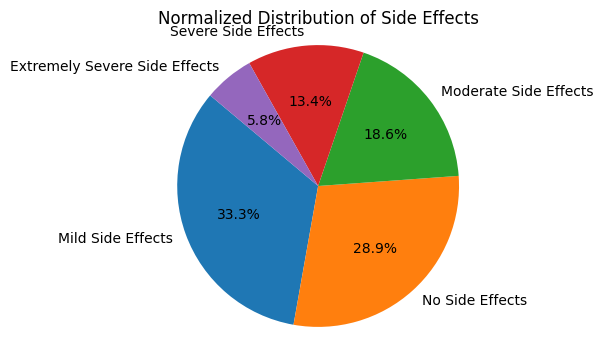

In [49]:
# Calculate normalized value counts
normalized_counts = data['SIDE EFFECTS'].value_counts(normalize=True)

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(normalized_counts, labels=normalized_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Normalized Distribution of Side Effects')
plt.show()

In [50]:
 # PATIENTS WITH MILD EFFECTS  ARE THE 33.3%, PEOPLE WITH EXTREME SIDE EFFECTS ARE 5.8 % OF TOTAL PATIENTS

In [51]:
#DRUG NAME

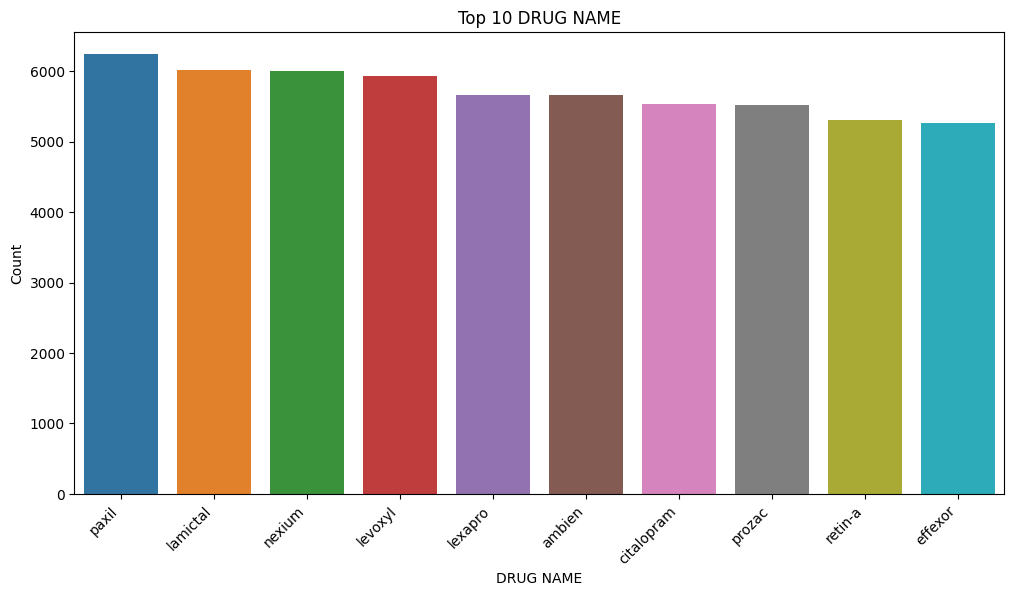

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing the drug names

top_n = 10  # Choose the number of top drugs to display

# Get the top N drugs and group the rest as "Others"
top_drugs = data['DRUG NAME'].value_counts().head(top_n)
#other_count = data['DRUG NAME'].value_counts().sum() - top_drugs.sum()

# Create a DataFrame for plotting
#plot_data = top_drugs.append(pd.Series({'Others': other_count}))

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_drugs.index, y=top_drugs.values)
plt.title(f'Top {top_n} DRUG NAME')
plt.xlabel('DRUG NAME')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [53]:
pd.set_option('display.max_rows', None)

In [54]:
data['DRUG NAME'].value_counts()


paxil                            6243
lamictal                         6015
nexium                           6001
levoxyl                          5927
lexapro                          5667
ambien                           5662
citalopram                       5536
prozac                           5514
retin-a                          5311
effexor                          5258
chantix                          5163
differin                         5128
provigil                         5032
topamax                          4602
augmentin                        4511
neurontin                        4210
ultram                           4021
amoxil                           3970
propecia                         3958
synthroid                        3831
retin-a-micro                    3696
doxycycline                      3680
elavil                           3576
metrogel                         3493
seroquel                         3289
wellbutrin                       3283
wellbutrin-x

In [55]:
#THE PLOT SHOWS THE TOP 10 DRUGS USED BY PATIENTS AND PAXIL TOPS THE LIST

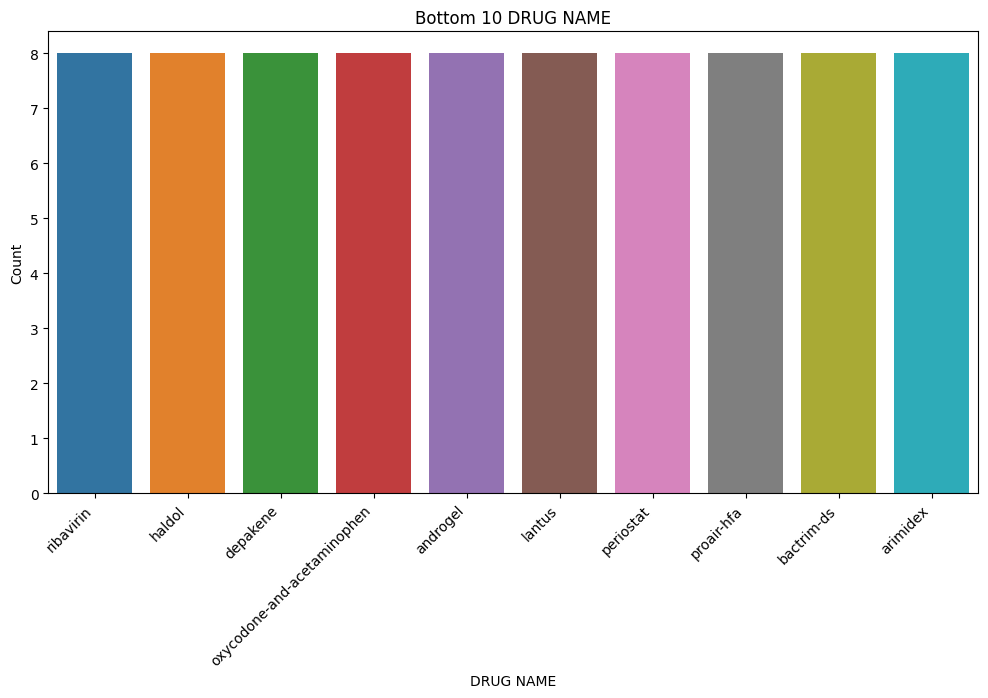

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing the drug names

bottom_n = 10  # Choose the number of bottom drugs to display

# Get the bottom N drugs
bottom_drugs = data['DRUG NAME'].value_counts().tail(bottom_n)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_drugs.index, y=bottom_drugs.values)
plt.title(f'Bottom {bottom_n} DRUG NAME')
plt.xlabel('DRUG NAME')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [57]:
drug_counts = data['DRUG NAME'].value_counts()
drug_names_with_8_counts = drug_counts[drug_counts == 8].index.tolist()
drug_names_with_8_counts


['rifadin',
 'bisoprolol',
 'zyvox',
 'arthrotec',
 'dapsone',
 'lybrel',
 'risperdal-consta',
 'pamelor',
 'vesicare',
 'inspra',
 'progesterone',
 'metformin-extended-release',
 'vigamox',
 'vistaril',
 'levetiracetam',
 'erythra-derm',
 'estring',
 'tapazole',
 'bactroban',
 'cardura',
 'amerge',
 'baciim',
 'asmanex',
 'femara',
 'accolate',
 'detrol',
 'warfarin',
 'glucophage-xr',
 'vicoprofen',
 'sanctura-xr',
 'kenalog',
 'nardil',
 'pepcid',
 'nasacort-aq',
 'lotronex',
 'bystolic',
 'cefzil',
 'azor',
 'zovirax-topical',
 'omacor',
 'proloprim',
 'quibron-t',
 'lidocaine',
 'lodine',
 'estrostep-fe',
 'ziac',
 'nizoral',
 'diltiazem',
 'corgard',
 'lac-hydrin',
 'cardura-xl',
 'fentanyl',
 'benicar-hct',
 'azasan',
 'locoid-lipocream',
 'hydrocodone-and-acetaminophen',
 'atripla',
 'penicillin-v',
 'prochlorperazine',
 'betaseron',
 'tofranil-pm',
 'lidex',
 'enablex',
 'vioxx',
 'meperidine',
 'polymyxin-b',
 'nizoral-shampoo',
 'penlac',
 'trilipix',
 'dicyclomine',
 'deson

In [58]:
len(drug_names_with_8_counts)

101

In [59]:
#THE ABOVE CODE SHOWS THAT 101 DRUGS ARE LEAST PREFERRED

***BIVARIATE ANALYSIS***

In [60]:
#GENDER VS AGE

GENDER      F      M
AGE                 
10-14     304    220
15-19    3793   2607
20-24   23612  16062
25-29   28693  19402
30-34   25452  17180
35-39   32937  22475
40-44   30051  20447
45-49   26713  18315
50-54   34014  23127
55-59   15905  10994
60-64   12033   8216
65-69    2608   1787
70-74     705    496
75+         1      1


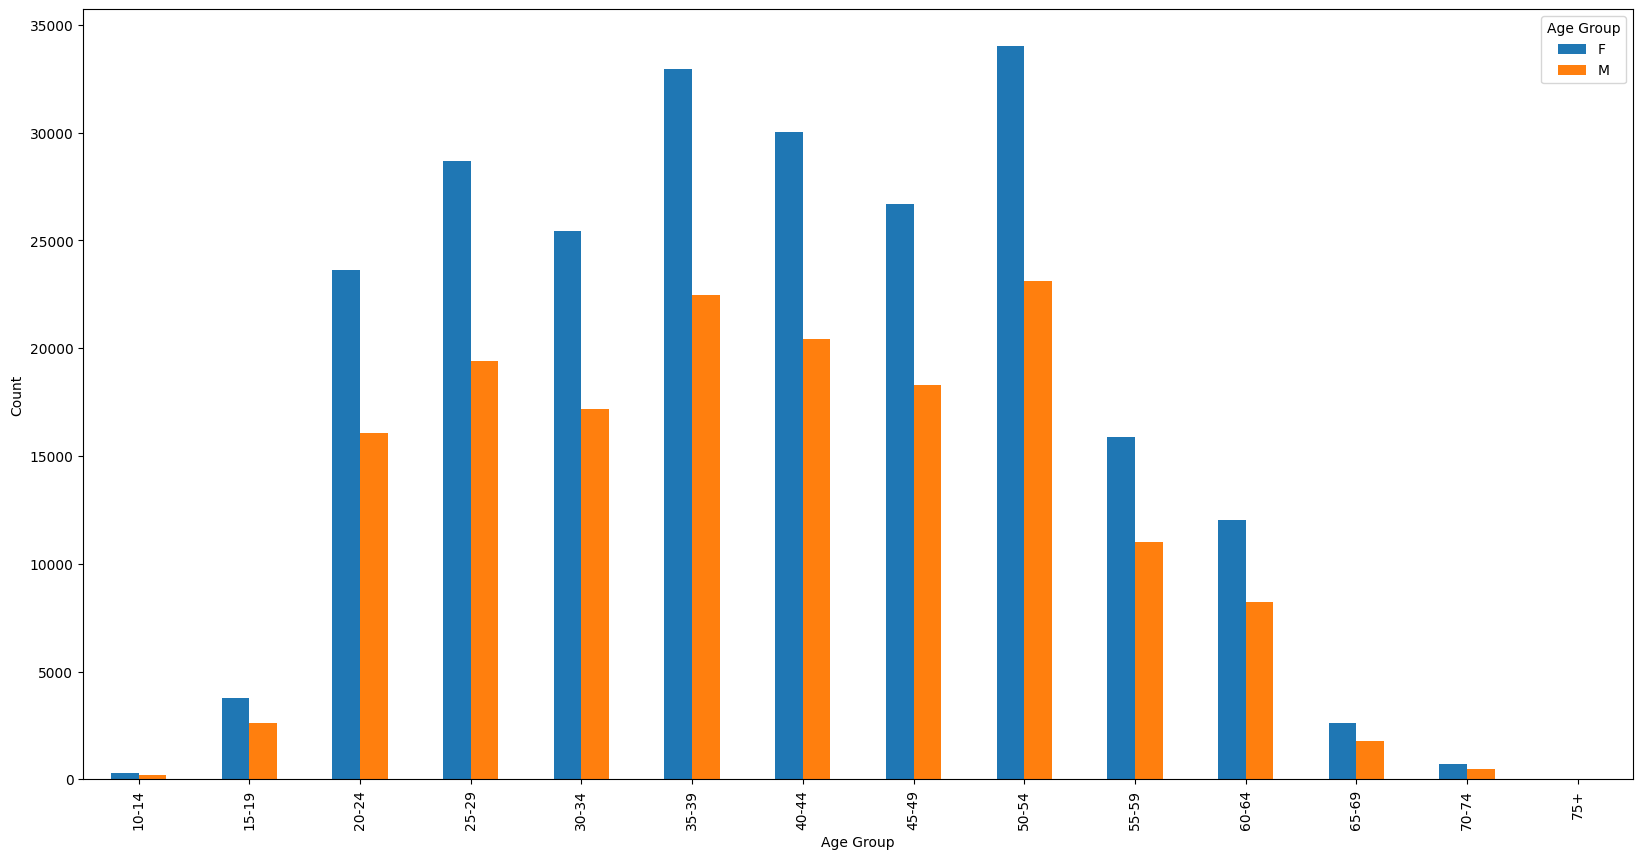

In [61]:
age_groups = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75+']

# Create a contingency table with age groups
contingency_table = pd.crosstab(pd.cut(data['AGE'], bins=range(0, 81, 5), labels=age_groups), data['GENDER'])

print(contingency_table)

# Plot the contingency table
contingency_table.plot(kind='bar', figsize=(20, 10))
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.show()

In [62]:
#MAJORITY PATIENTS ARE IN THE AGE GROUP OF 20-59, AND OUT OF THAT TOO FEMALES ARE HIGHER THAN MALES IN ALL GROUPS

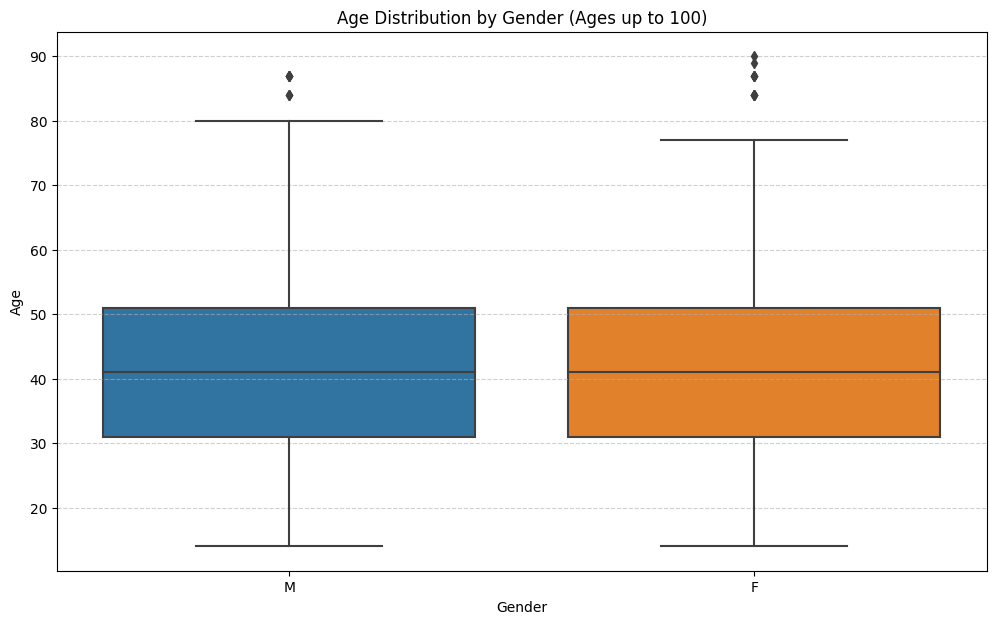

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing the 'AGE' and 'GENDER' columns

# Filter the data to include ages up to 100
data_filtered = data[data['AGE'] <= 100]

plt.figure(figsize=(12, 7))
sns.boxplot(x='GENDER', y='AGE', data=data_filtered)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age Distribution by Gender (Ages up to 100)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [64]:
#INFERENCE TO BE NOTED : IRRESPECTIVE OF GENDER PEOPLE OF SAME AGE ARE SUFFERING FROM ILLNESS

In [65]:
#GENDER VS SIDE EFFECTS

In [66]:
import pandas as pd

# Assuming 'data' is your DataFrame
contingency_table = pd.crosstab(data['GENDER'], data['SIDE EFFECTS'], margins=True, margins_name='Total')


In [67]:
contingency_table

SIDE EFFECTS,Extremely Severe Side Effects,Mild Side Effects,Moderate Side Effects,No Side Effects,Severe Side Effects,Total
GENDER,,,,,,
F,13647,78867,44048,68554,31736,236852
M,9287,53800,30118,46693,21458,161356
Total,22934,132667,74166,115247,53194,398208


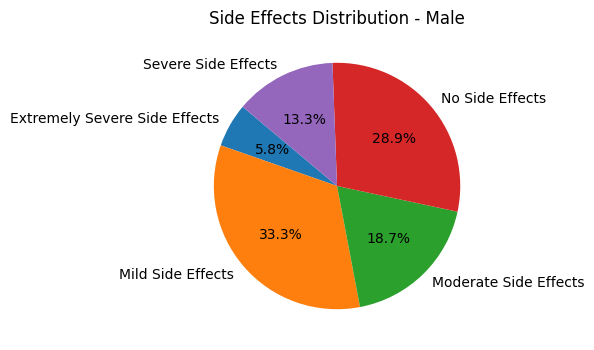

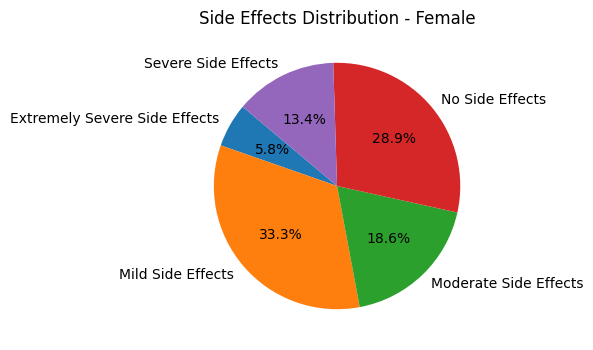

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
contingency_table = pd.crosstab(data['GENDER'], data['SIDE EFFECTS'], margins=True, margins_name='Total')

# Separate contingency table for Male and Female
male_table = contingency_table.loc['M']
female_table = contingency_table.loc['F']

# Calculate percentages for Male and Female
male_percentages = male_table / male_table['Total'] * 100
female_percentages = female_table / female_table['Total'] * 100

# Plot pie chart for Male
plt.figure(figsize=(8, 4))
plt.pie(male_percentages[:-1], labels=male_percentages.index[:-1], autopct='%1.1f%%', startangle=140)
plt.title("Side Effects Distribution - Male")
plt.show()

# Plot pie chart for Female
plt.figure(figsize=(8, 4))
plt.pie(female_percentages[:-1], labels=female_percentages.index[:-1], autopct='%1.1f%%', startangle=140)
plt.title("Side Effects Distribution - Female")
plt.show()


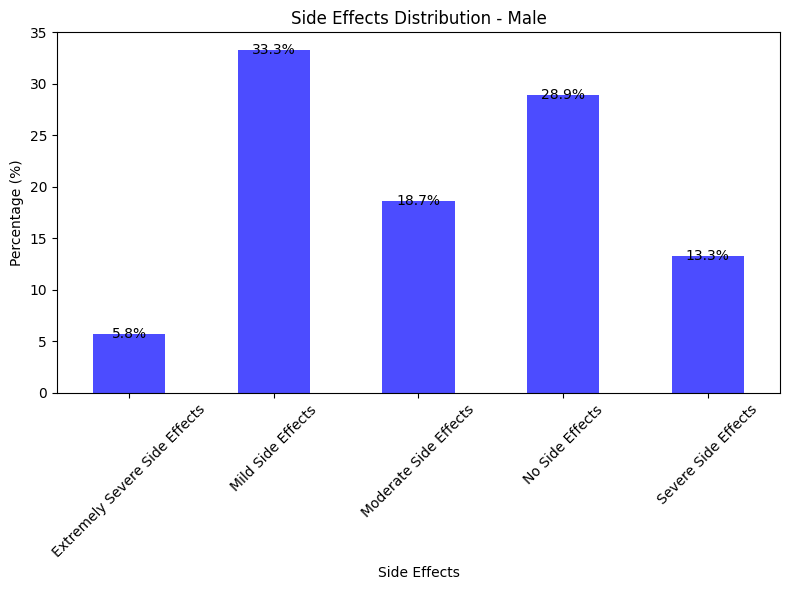

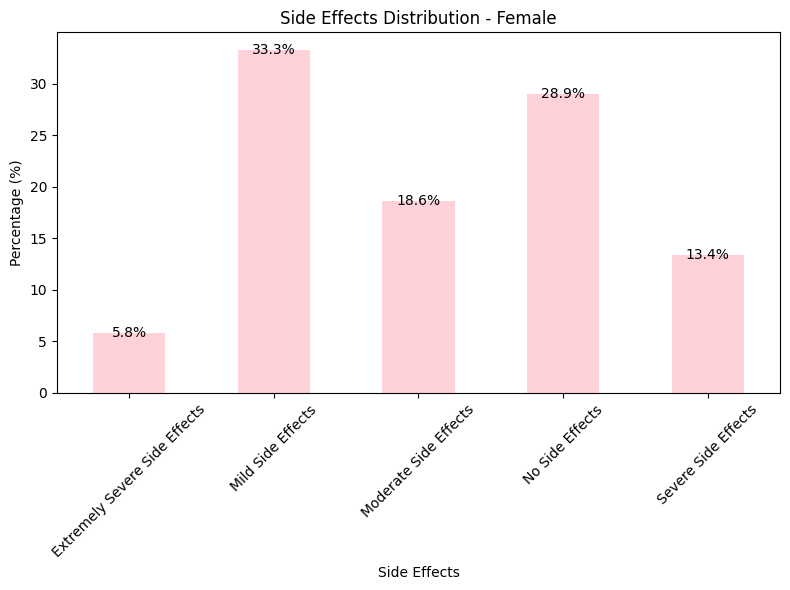

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
contingency_table = pd.crosstab(data['GENDER'], data['SIDE EFFECTS'], margins=True, margins_name='Total')

# Separate contingency table for Male and Female
male_table = contingency_table.loc['M']
female_table = contingency_table.loc['F']

# Calculate percentages for Male and Female
male_percentages = (male_table / male_table['Total'])[:-1] * 100
female_percentages = (female_table / female_table['Total'])[:-1] * 100

# Plot bar chart for Male
plt.figure(figsize=(8, 6))
ax = male_percentages.plot(kind='bar', color='blue', alpha=0.7)
plt.title("Side Effects Distribution - Male")
plt.xlabel("Side Effects")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.tight_layout()

# Add percentages above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

plt.show()

# Plot bar chart for Female
plt.figure(figsize=(8, 6))
ax = female_percentages.plot(kind='bar', color='pink', alpha=0.7)
plt.title("Side Effects Distribution - Female")
plt.xlabel("Side Effects")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.tight_layout()

# Add percentages above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

plt.show()


<Figure size 1200x800 with 0 Axes>

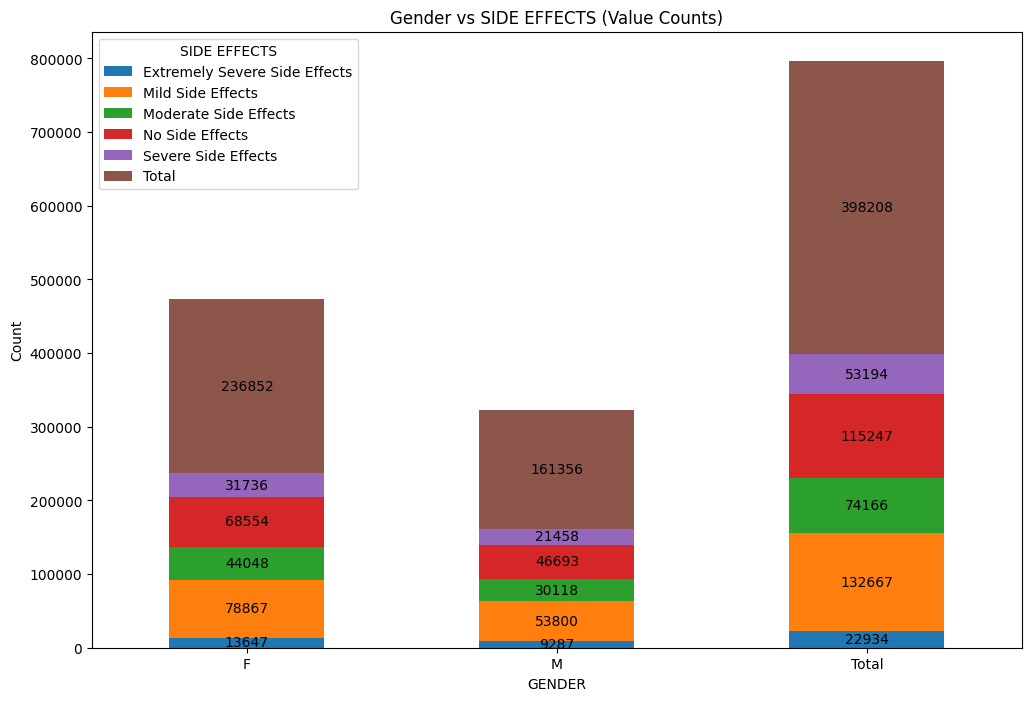

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'contingency_table' is your DataFrame containing the contingency table data

plt.figure(figsize=(12, 8))

# Create a stacked bar plot
ax = contingency_table.plot(kind='bar', stacked=True, figsize=(12, 8))

# Iterate through each bar
for container in ax.containers:
    # Iterate through each segment of the bar
    for p in container.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_x(), p.get_y()

        # Display the value counts at the center of each segment
        ax.annotate(f'{int(height)}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='black')

plt.xlabel('GENDER')
plt.ylabel('Count')
plt.title('Gender vs SIDE EFFECTS (Value Counts)')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='SIDE EFFECTS')
plt.show()


In [71]:
# IRRESPECTIVE OF THE GENDER ,PATIENTS WITH MILD SIDE EFFECTS ARE MAX, AND THOSE WITH EXTREME SEVERE SIDE EFFECTS ARE MIN.

In [72]:
#GENDER VS RACE

In [73]:
import pandas as pd

# Assuming 'data' is your DataFrame
contingency_table = pd.crosstab(data['GENDER'], data['RACE'], margins=True, margins_name='Total')


In [74]:
contingency_table

RACE,Asian Indian,"Asian, Other",Black,Chinese,"Hispanic, Black","Hispanic, White",Other,Unknown,White,Total
GENDER,,,,,,,,,,
F,60,99,21217,5,976,26239,589,1814,185853,236852
M,44,69,14476,3,682,17631,413,1218,126820,161356
Total,104,168,35693,8,1658,43870,1002,3032,312673,398208


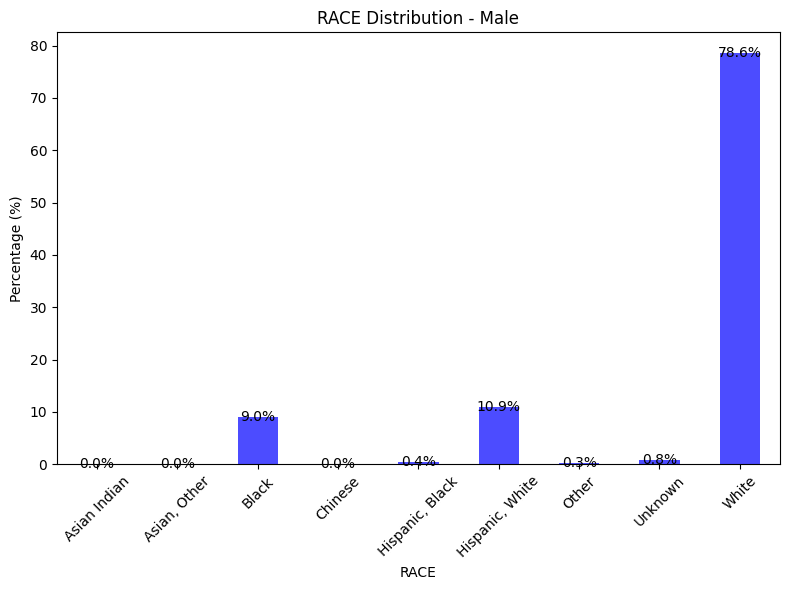

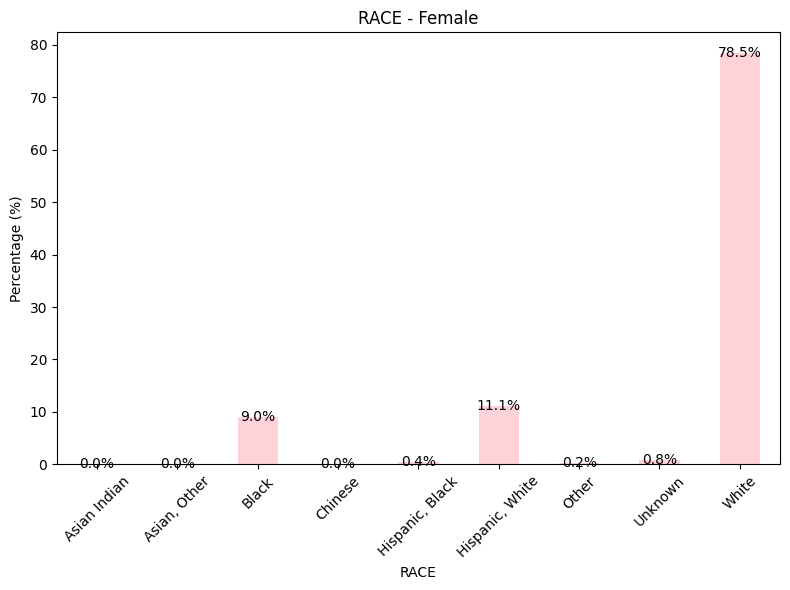

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
contingency_table = pd.crosstab(data['GENDER'], data['RACE'], margins=True, margins_name='Total')

# Separate contingency table for Male and Female
male_table = contingency_table.loc['M']
female_table = contingency_table.loc['F']

# Calculate percentages for Male and Female
male_percentages = (male_table / male_table['Total'])[:-1] * 100
female_percentages = (female_table / female_table['Total'])[:-1] * 100

# Plot bar chart for Male
plt.figure(figsize=(8, 6))
ax = male_percentages.plot(kind='bar', color='blue', alpha=0.7)
plt.title("RACE Distribution - Male")
plt.xlabel("RACE")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.tight_layout()

# Add percentages above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

plt.show()

# Plot bar chart for Female
plt.figure(figsize=(8, 6))
ax = female_percentages.plot(kind='bar', color='pink', alpha=0.7)
plt.title("RACE - Female")
plt.xlabel("RACE")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.tight_layout()

# Add percentages above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

plt.show()


In [76]:
# MOJORITY PATIENTS ARE WHITES ,CHINESE ARE MINORITY

In [77]:
#GENDER VS DRUG NAME

<Figure size 2500x2000 with 0 Axes>

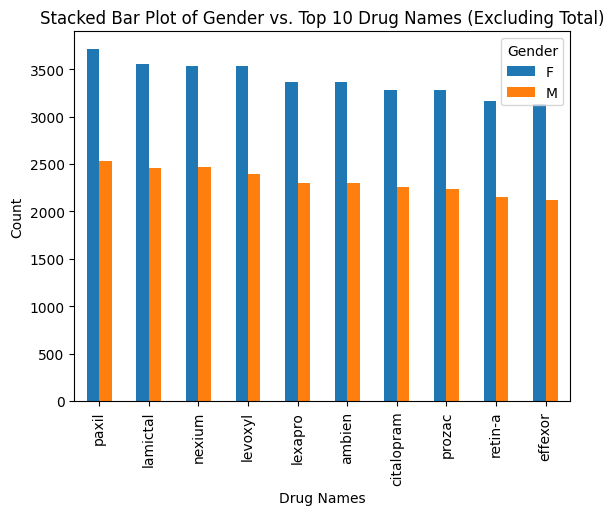

In [78]:


contingency_table = pd.crosstab(data['GENDER'], data['DRUG NAME'])
# Sort the drug names based on their counts in descending order
sorted_drugs = contingency_table.sum().sort_values(ascending=False)

# Select the top 10 drug names
top_10_drugs = sorted_drugs.head(10)

# Create a DataFrame with the selected drug names
selected_contingency = contingency_table[top_10_drugs.index]
# Create a bar plot
plt.figure(figsize=(25, 20))
selected_contingency.T.plot(kind='bar')

plt.xlabel('Drug Names')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Gender vs. Top 10 Drug Names (Excluding Total)')
plt.legend(title='Gender', loc='upper right')
plt.xticks(rotation=90)
plt.show()

paxil - depression/anxiety lamictal - bi-polar disorder, depression levoxyl - low thyroid production nexium - gerd/barret's esophogus, acid reflux ambien - insomnia lexapro - depression citalopram - depression prozac - depression retin-a - clearing skin effexor - depression



In [79]:
import pandas as pd

# Assuming 'data' is your DataFrame
contingency_table = pd.crosstab(data['GENDER'], data['DRUG NAME'], margins=True, margins_name='Total')

# Remove the 'Total' column
contingency_table = contingency_table.drop('Total', axis=1)

# Get the top 10 drug names for both Male and Female
top_10_male_drugs = contingency_table.loc['M'].nlargest(10).index.tolist()
top_10_female_drugs = contingency_table.loc['F'].nlargest(10).index.tolist()

# Filter the DataFrame for Male and Female separately
male_data = data[data['GENDER'] == 'M']
female_data = data[data['GENDER'] == 'F']

# Get value counts for the top 10 drugs for Male
male_top_10_counts = male_data[male_data['DRUG NAME'].isin(top_10_male_drugs)]['DRUG NAME'].value_counts()

# Get value counts for the top 10 drugs for Female
female_top_10_counts = female_data[female_data['DRUG NAME'].isin(top_10_female_drugs)]['DRUG NAME'].value_counts()

print("Value Counts for Top 10 Drugs for Males:")
print(male_top_10_counts)

print("\nValue Counts for Top 10 Drugs for Females:")
print(female_top_10_counts)


Value Counts for Top 10 Drugs for Males:
paxil         2530
nexium        2463
lamictal      2461
levoxyl       2390
lexapro       2302
ambien        2297
citalopram    2260
prozac        2235
retin-a       2149
effexor       2121
Name: DRUG NAME, dtype: int64

Value Counts for Top 10 Drugs for Females:
paxil         3713
lamictal      3554
nexium        3538
levoxyl       3537
lexapro       3365
ambien        3365
prozac        3279
citalopram    3276
retin-a       3162
effexor       3137
Name: DRUG NAME, dtype: int64


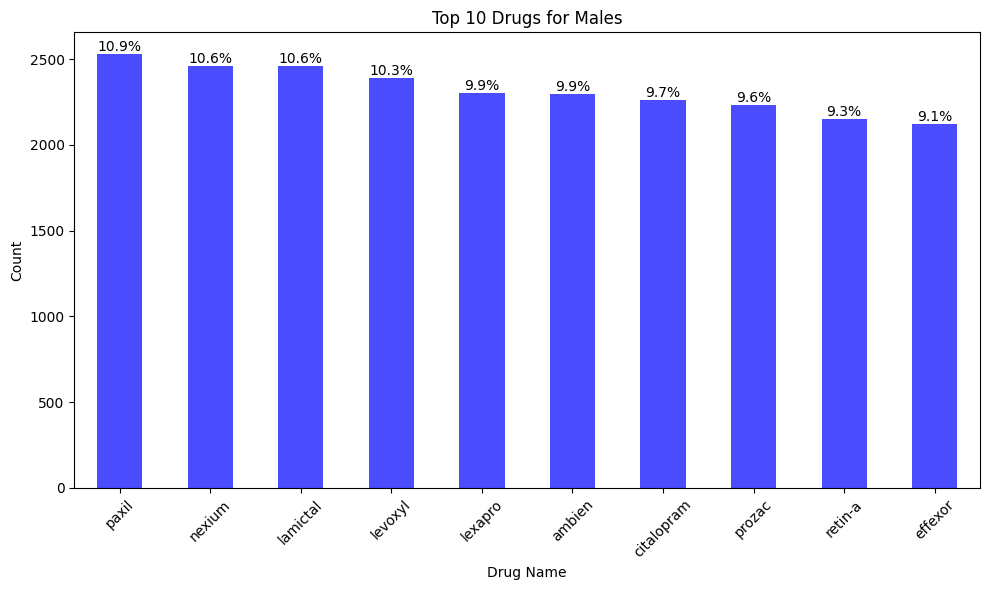

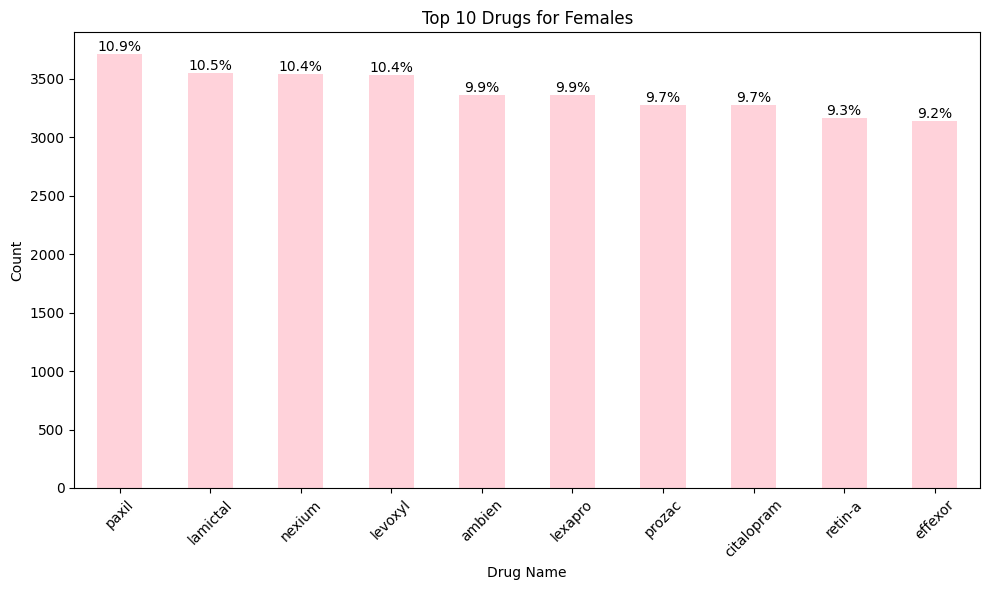

In [80]:
# Assuming 'data' is your DataFrame
contingency_table = pd.crosstab(data['GENDER'], data['DRUG NAME'], margins=True, margins_name='Total')

# Separate contingency table for Male and Female
male_table = contingency_table.loc['M']
female_table = contingency_table.loc['F']

# Remove the 'Total' column and sort by the counts in descending order
male_top_10 = male_table.drop('Total').sort_values(ascending=False).head(10)
female_top_10 = female_table.drop('Total').sort_values(ascending=False).head(10)
# Plot bar chart for Male with percentages
plt.figure(figsize=(10, 6))
ax = male_top_10.plot(kind='bar', color='blue', alpha=0.7)
plt.title("Top 10 Drugs for Males")
plt.xlabel("Drug Name")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Annotate percentages above the bars
total_male = male_top_10.sum()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_male:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()
# Plot bar chart for Female with percentages
plt.figure(figsize=(10, 6))
ax = female_top_10.plot(kind='bar', color='pink', alpha=0.7)
plt.title("Top 10 Drugs for Females")
plt.xlabel("Drug Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
# Annotate percentages above the bars
total_female = female_top_10.sum()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_female:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [81]:
#TOP 10 DRUGS USED BY MALES AND FEMALES ARE SAME , THIS INDICATES BOTH HAVE SIMILAR HEALTH ISSUES ,mostly they are affected by depression or mental health issues

In [82]:
#DRUG NAME VS AGE

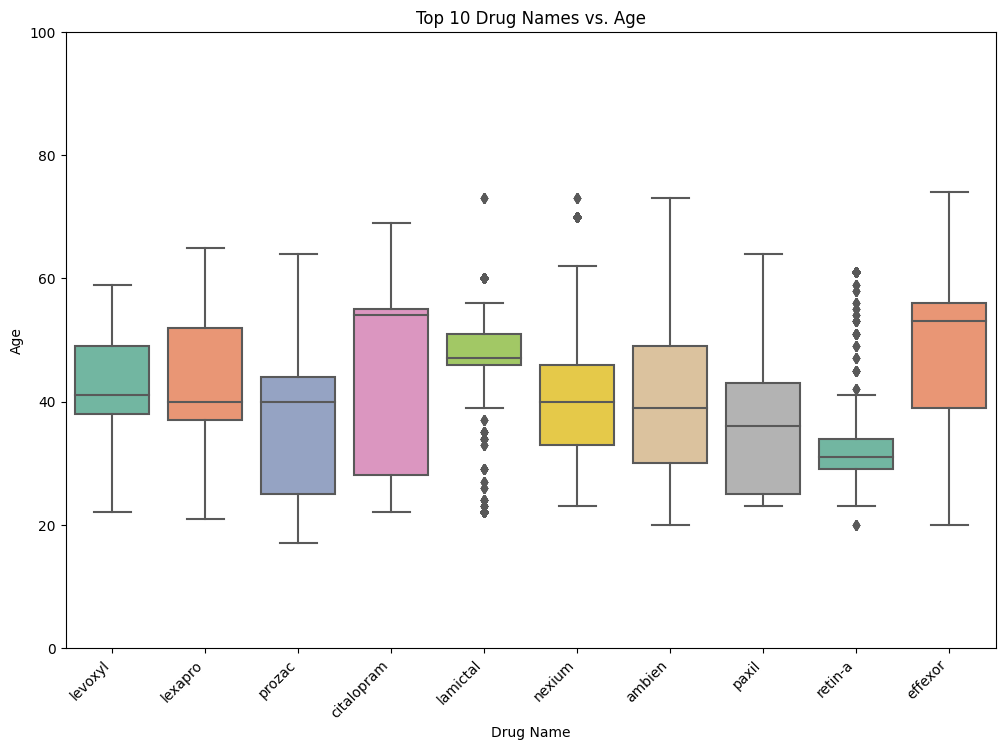

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the 'DRUG NAME' and 'AGE' columns

# Get the top 10 drug names
top_n = 10
top_drugs = data['DRUG NAME'].value_counts().head(top_n).index

# Filter the data to include only the top 10 drug names
filtered_data = data[data['DRUG NAME'].isin(top_drugs)]

# Create a box plot for the top 10 drug names vs. age
plt.figure(figsize=(12, 8))
sns.boxplot(x='DRUG NAME', y='AGE', data=filtered_data, palette='Set2')
plt.xlabel('Drug Name')
plt.ylabel('Age')
plt.title(f'Top {top_n} Drug Names vs. Age')
plt.xticks(rotation=45, ha='right')

# Set the y-axis limits to show ages only up to 100
plt.ylim(0, 100)

plt.show()


In [84]:
#Lamictal (lamotrigine) is an anticonvulsant used to treat epilepsy and bipolar disorder,most of the patients are in the age group of 40 to 55.

In [85]:
#retin-a: youngsters are taking :used for skin conditions such as acne, wrinkles, hyperpigmentation, and rough texture.

In [86]:
#citalopram:preferred more by older patients :used as an antidepressant medication used to treat depression and certain anxiety disorders.

In [87]:
#effexor: preferred by older patients:antidepressant that is used to treat major depressive disorder, generalized anxiety disorder, and panic disorder.

In [88]:
# while Levoxyl (levothyroxine) is a thyroid hormone replacement medication used to treat hypothyroidism.

In [89]:
#DRUG NAME VS RACE

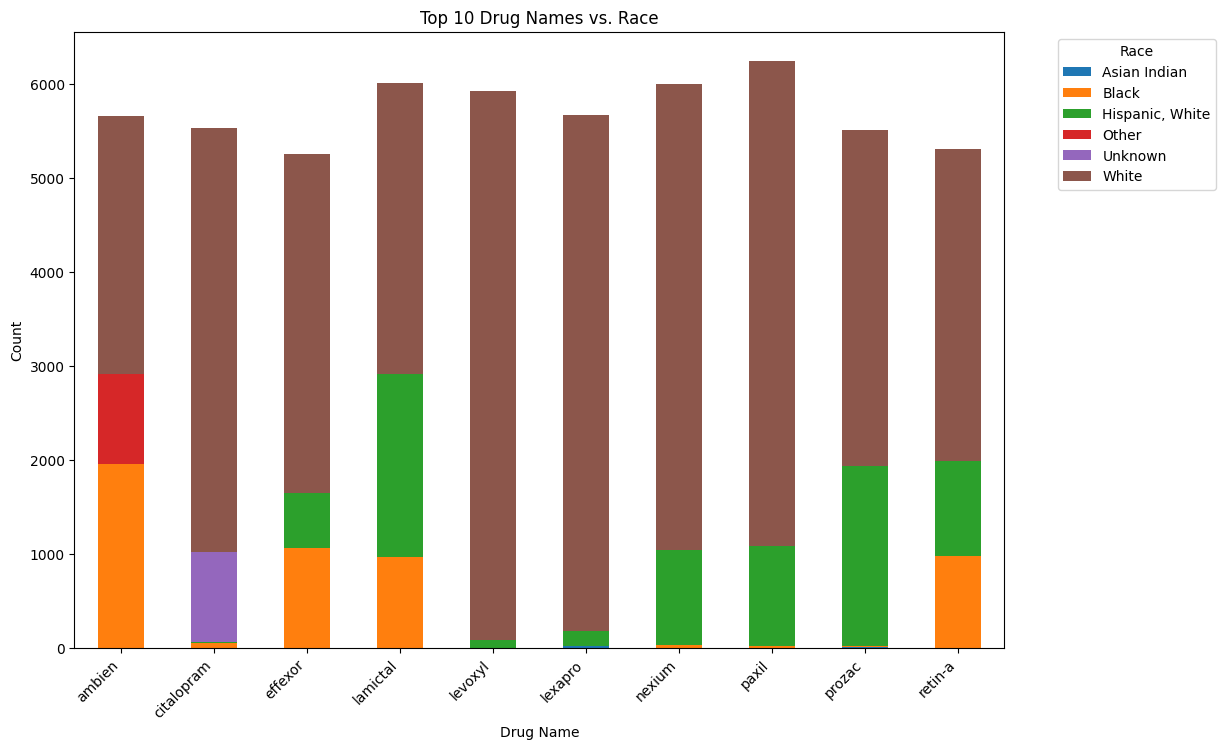

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing 'DRUG NAME' and 'RACE' columns

# Get the top 10 drug names
top_n = 10
top_drugs = data['DRUG NAME'].value_counts().head(top_n).index

# Filter the data to include only the top 10 drug names
filtered_data = data[data['DRUG NAME'].isin(top_drugs)]

# Create a DataFrame with counts of drug usage by race
drug_race_counts = filtered_data.groupby(['DRUG NAME', 'RACE']).size().unstack(fill_value=0)

# Plot a grouped bar plot
ax = drug_race_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Drug Name')
plt.ylabel('Count')
plt.title('Top 10 Drug Names vs. Race')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()


In [91]:
import pandas as pd

# Assuming 'data' is your DataFrame containing 'DRUG NAME' and 'RACE' columns

# Get the top 10 drug names
top_n = 10
top_drugs = data['DRUG NAME'].value_counts().head(top_n).index

# Filter the data to include only the top 10 drug names
filtered_data = data[data['DRUG NAME'].isin(top_drugs)]

# Create a crosstab between the filtered 'DRUG NAME' and 'RACE'
cross_tab = pd.crosstab(filtered_data['DRUG NAME'], filtered_data['RACE'])

# Display the crosstab
cross_tab


RACE,Asian Indian,Black,"Hispanic, White",Other,Unknown,White
DRUG NAME,,,,,,
ambien,0,1959,0,954,0,2749
citalopram,0,56,8,0,956,4516
effexor,0,1067,581,0,0,3610
lamictal,0,971,1948,0,0,3096
levoxyl,0,0,88,0,0,5839
lexapro,16,0,168,0,0,5483
nexium,0,32,1007,0,0,4962
paxil,0,24,1063,0,0,5156
prozac,8,8,1920,0,0,3578


In [92]:
#these top 10 drugs are generally preferred by whites ,hispanic whites and blacks ,THESE PEOPLE SUFFER WITH COMMON ILLNESS THAT IS DEPRESSION .

In [93]:
#DRUG NAME VS SIDE EFFECTS

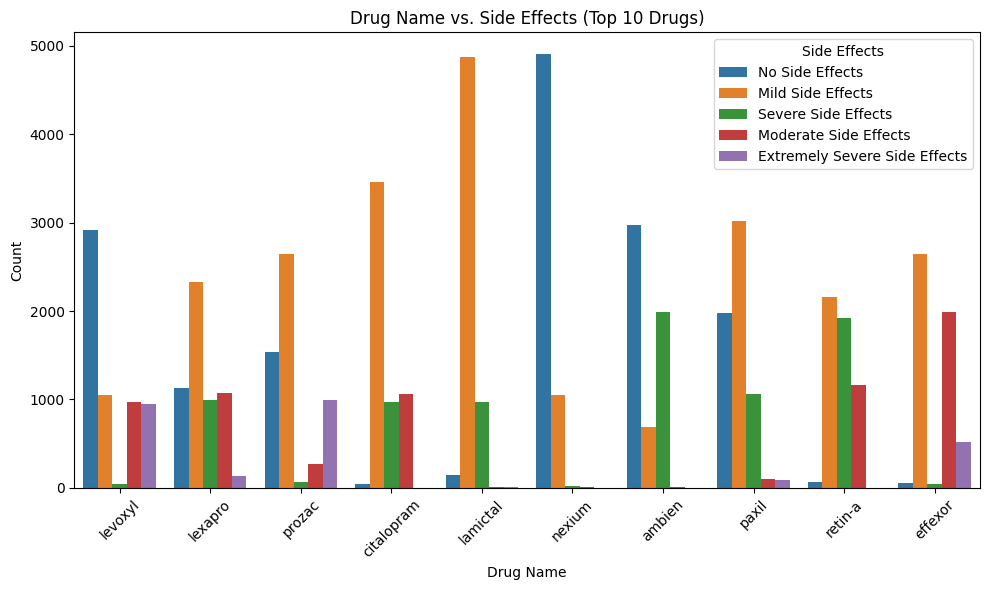

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame to include only the top 10 drug names
drugname_counts = data['DRUG NAME'].value_counts()
top_10_drug_names = drugname_counts.head(10).index.tolist()
filtered_df = data[data['DRUG NAME'].isin(top_10_drug_names)]

# Create a countplot for Drug Name vs. Side Effects
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.countplot(x='DRUG NAME', hue='SIDE EFFECTS', data=filtered_df)

# Set the title and labels for the plot
plt.title('Drug Name vs. Side Effects (Top 10 Drugs)')
plt.xlabel('Drug Name')
plt.ylabel('Count')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Display the plot
plt.legend(title='Side Effects', loc='upper right')  # Add legend
plt.tight_layout()
plt.show()


In [95]:
#contingency table

In [96]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Get the top 10 drug names
top_10_drugs = data['DRUG NAME'].value_counts().nlargest(10).index.tolist()

# Filter the DataFrame to include only the top 10 drugs
data_filtered = data[data['DRUG NAME'].isin(top_10_drugs)]

# Create the contingency table for top 10 drugs vs. side effects
contingency_table1 = pd.crosstab(data_filtered['DRUG NAME'], data_filtered['SIDE EFFECTS'])

print("Contingency Table for Top 10 Drug Names vs. Side Effects:")
contingency_table1


Contingency Table for Top 10 Drug Names vs. Side Effects:


SIDE EFFECTS,Extremely Severe Side Effects,Mild Side Effects,Moderate Side Effects,No Side Effects,Severe Side Effects
DRUG NAME,,,,,
ambien,0,688,16,2973,1985
citalopram,0,3460,1061,40,975
effexor,517,2644,1993,56,48
lamictal,8,4872,16,144,975
levoxyl,947,1048,972,2912,48
lexapro,136,2329,1077,1128,997
nexium,0,1056,16,4905,24
paxil,88,3017,96,1980,1062
prozac,998,2640,272,1540,64


In [97]:
df=contingency_table1
df['Sum'] = df['Mild Side Effects'] + df['No Side Effects']
df

SIDE EFFECTS,Extremely Severe Side Effects,Mild Side Effects,Moderate Side Effects,No Side Effects,Severe Side Effects,Sum
DRUG NAME,,,,,,
ambien,0,688,16,2973,1985,3661
citalopram,0,3460,1061,40,975,3500
effexor,517,2644,1993,56,48,2700
lamictal,8,4872,16,144,975,5016
levoxyl,947,1048,972,2912,48,3960
lexapro,136,2329,1077,1128,997,3457
nexium,0,1056,16,4905,24,5961
paxil,88,3017,96,1980,1062,4997
prozac,998,2640,272,1540,64,4180


In [98]:
#AMBIEN ,CITALOPRAM ,NEXIUM , RETIN-A ARE THE ONES HAVING NO CASE OF EXTREME SIDE EFFECTS,but all have severe side effects only nexium out of this is having least patients with severe side effects too

In [99]:
#nexium ,paxil and lamictal are the drugs which are either having very mild side efefcts or no side effects at all .

In [100]:
#AGE VS RACE

In [101]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the 'AGE' and 'RACE' columns

# Filter the data to include ages up to 100
filtered_data = data[data['AGE'] <= 100]

# Create a contingency table
contingency_table = pd.crosstab(filtered_data['AGE'], filtered_data['RACE'])



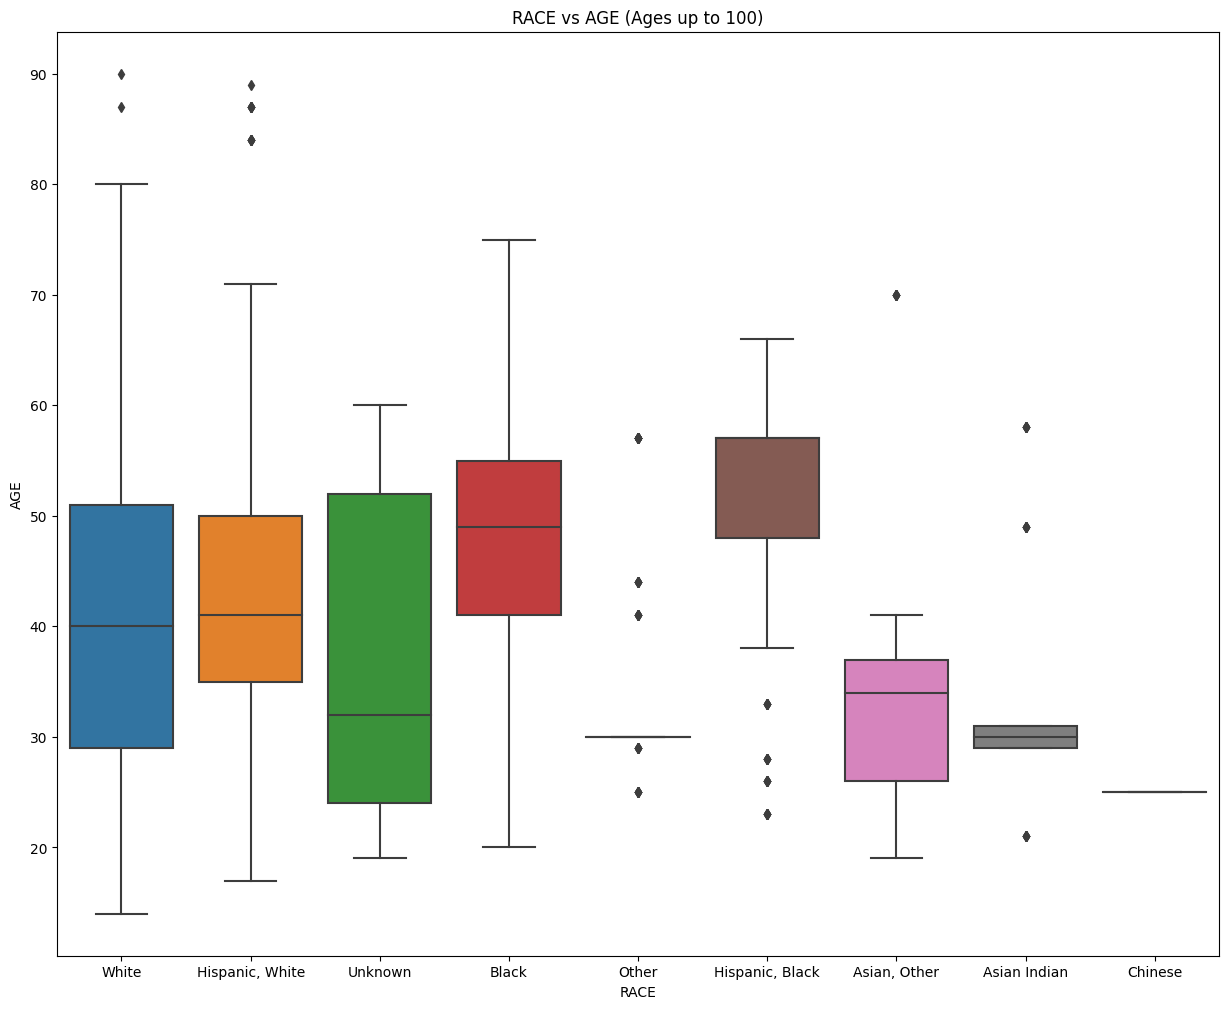

In [102]:
plt.figure(figsize=(15, 12))
filtered_data = data[data['AGE'] <= 100]  # Filter data for ages up to 100
sns.boxplot(x='RACE', y='AGE', data=filtered_data)
plt.title('RACE vs AGE (Ages up to 100)')
plt.show()


In [103]:
#china and asian indian have only young patients ,white ,hiSpanic white and blacks have patients from young age to senior citizens

In [104]:
#AGE VS SIDE EFFECTS

In [105]:
import pandas as pd

# Assuming 'AGE' and 'CATEGORY' are the column names in your dataset
# Create age bins with three groups: 0-30, 31-60, and 60 above
age_bins = pd.cut(data['AGE'], bins=[0, 30, 60, float('inf')], labels=['0-30', '31-60', '60+'])
contingency_table = pd.crosstab(age_bins, data['SIDE EFFECTS'])

# Display the contingency table
print(contingency_table)


SIDE EFFECTS  Extremely Severe Side Effects  Mild Side Effects  \
AGE                                                              
0-30                                   1974              34632   
31-60                                 20730              88875   
60+                                     228               9154   

SIDE EFFECTS  Moderate Side Effects  No Side Effects  Severe Side Effects  
AGE                                                                        
0-30                          21939            26067                10081  
31-60                         46461            82553                38991  
60+                            5762             6620                 4121  


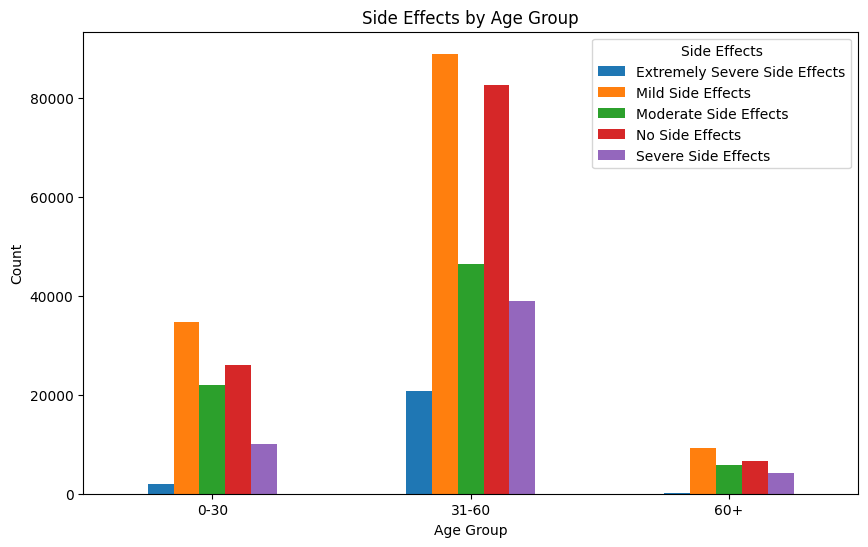

In [106]:
# Plot the contingency table as a bar plot
ax = contingency_table.plot(kind='bar', figsize=(10, 6))

# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Side Effects by Age Group')

# Display the legend
plt.legend(title='Side Effects', loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Show the plot
plt.show()

In [107]:
#Severity Trends: Across all age groups, "Mild Side Effects" are consistently the most reported, followed by "Moderate Side Effects." However, the prevalence of "Severe Side Effects" and "Extremely Severe Side Effects" tends to increase with age, with the 60+ age group having a relatively higher proportion of these severe side effects.

In [108]:
#RACE VS SIDE EFFECTS(RECONSIDER INFERENCE)

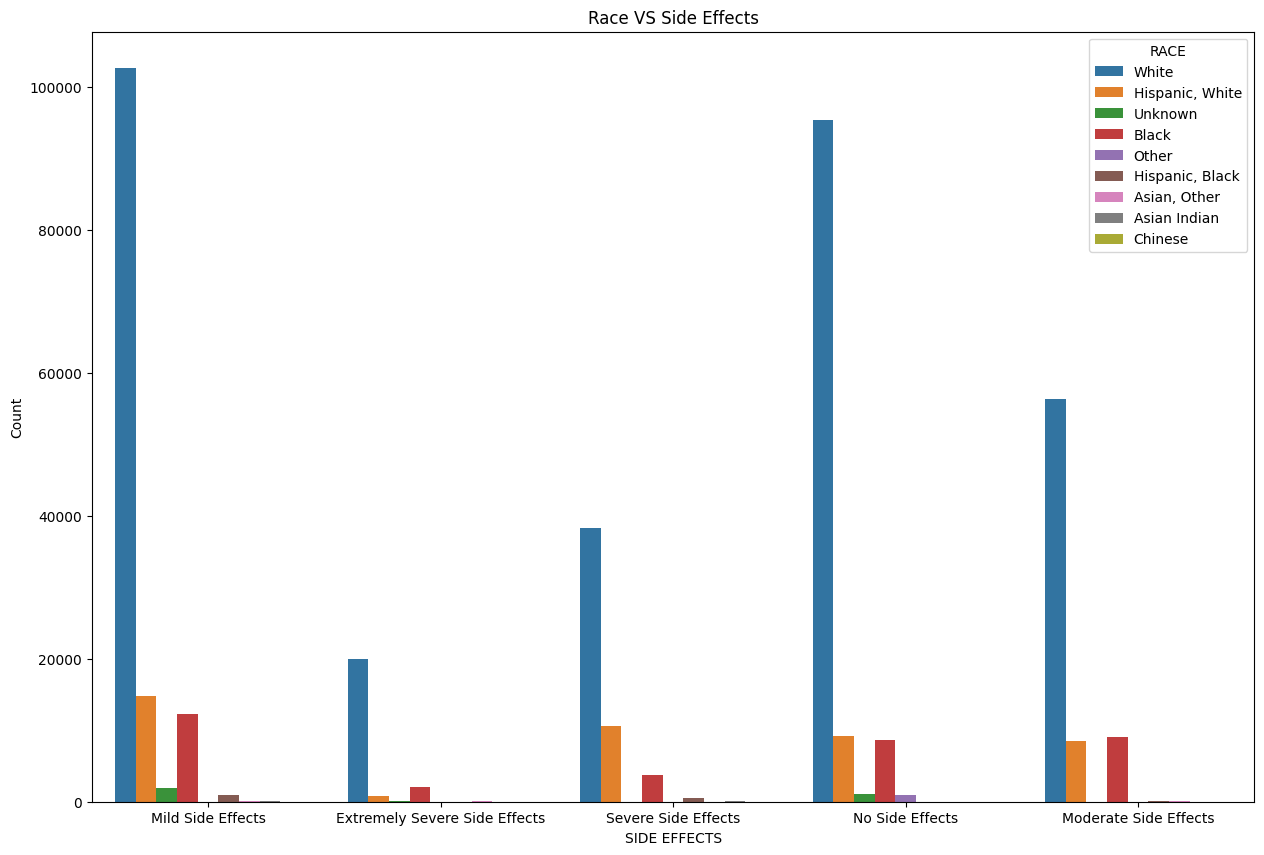

In [109]:
plt.figure(figsize=(15, 10))  # Adjust the width and height as needed
sns.countplot(x='SIDE EFFECTS', hue='RACE', data=data)
plt.xlabel('SIDE EFFECTS')
plt.ylabel('Count')
plt.title('Race VS Side Effects')
plt.show()


In [110]:
#BLACKS  ARE SHOWING EXTREME SEVERE SIDE EFFECTS COMPARED TO HISPANIC WHITE ,BLACKS ARE SHOWING MODERATE SIDE EFFECTS A BIT HIGHER COMPARED TO HISPANIC WHITE

In [111]:
import pandas as pd

# Define the different parts of side effects
side_effect_parts = ['Extremely Severe Side Effects', 'Mild Side Effects', 'Severe Side Effects','No Side Effects','Moderate Side Effects']

# Initialize an empty DataFrame for the contingency table
contingency_table = pd.DataFrame()

# Iterate through each part of side effects
for part in side_effect_parts:
    # Create a contingency table for Race vs. the current part of side effects
    part_contingency_table = pd.crosstab(data['RACE'], data['SIDE EFFECTS'][data['SIDE EFFECTS'] == part])

    # Rename the columns to include the part of side effects
    part_contingency_table.columns = [f'{part}: {col}' for col in part_contingency_table.columns]

    # Concatenate the current part's contingency table with the overall contingency table
    contingency_table = pd.concat([contingency_table, part_contingency_table], axis=1)

# Display the resulting contingency table
contingency_table


,Extremely Severe Side Effects: Extremely Severe Side Effects,Mild Side Effects: Mild Side Effects,Severe Side Effects: Severe Side Effects,No Side Effects: No Side Effects,Moderate Side Effects: Moderate Side Effects
RACE,,,,,
"Asian, Other",48.0,32.0,16.0,16.0,56.0
Black,2006.0,12238.0,3769.0,8638.0,9042.0
"Hispanic, Black",8.0,976.0,506.0,24.0,144.0
"Hispanic, White",796.0,14839.0,10529.0,9159.0,8547.0
Unknown,48.0,1932.0,8.0,1020.0,24.0
White,20028.0,102602.0,38310.0,95404.0,56329.0
Asian Indian,NaN,40.0,40.0,16.0,8.0
Chinese,NaN,8.0,NaN,NaN,NaN
Other,NaN,NaN,16.0,970.0,16.0


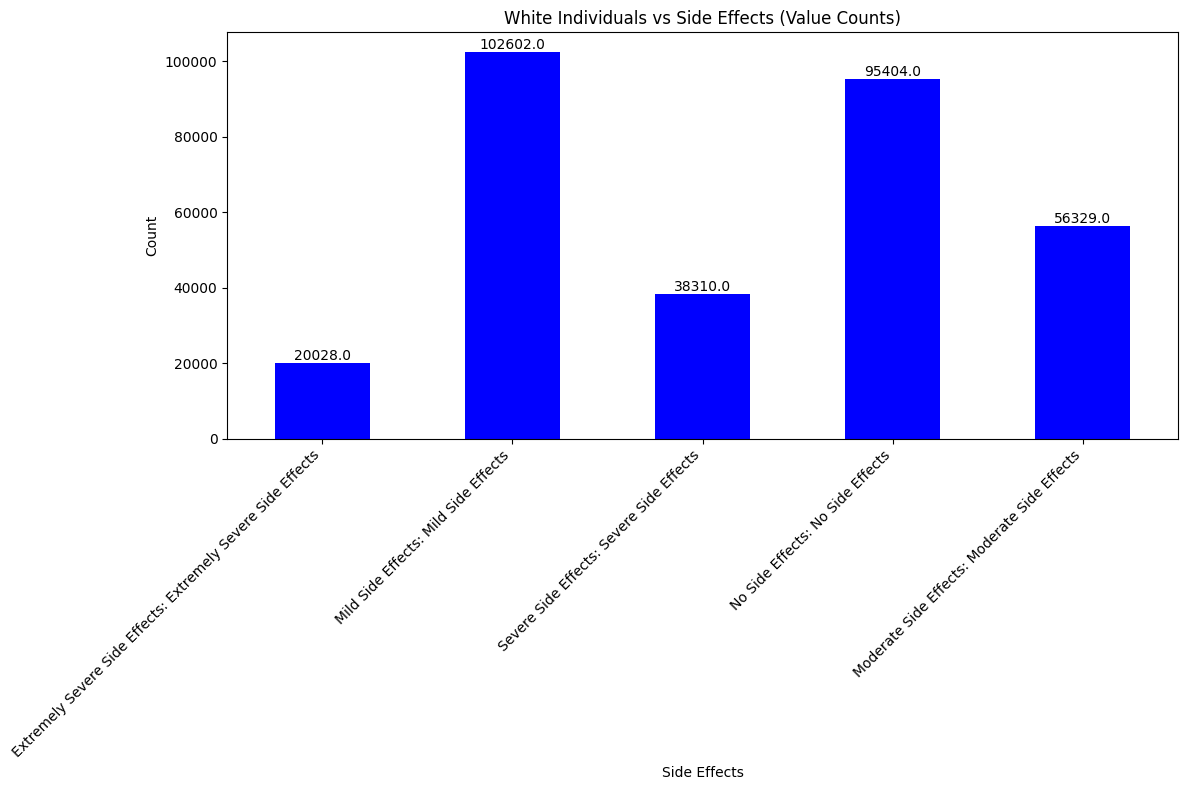

In [112]:
import matplotlib.pyplot as plt

# Assuming you have already created the contingency_table for Race vs Side Effects as described earlier

# Access the counts of White race individuals for all side effects
white_race_counts = contingency_table.loc['White']

# Create a bar plot for the value counts of White individuals
plt.figure(figsize=(12, 8))
ax = white_race_counts.plot(kind='bar', color='blue')
plt.xlabel('Side Effects')
plt.ylabel('Count')
plt.title('White Individuals vs Side Effects (Value Counts)')
plt.xticks(rotation=45, ha='right')

# Add value counts above each bar
for p in ax.patches:
    height = p.get_height()
    plt.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.tight_layout()
plt.show()


MULTIVARIATE ANALYSIS

In [113]:
#DRUG NAME VS GENDER VS AGE

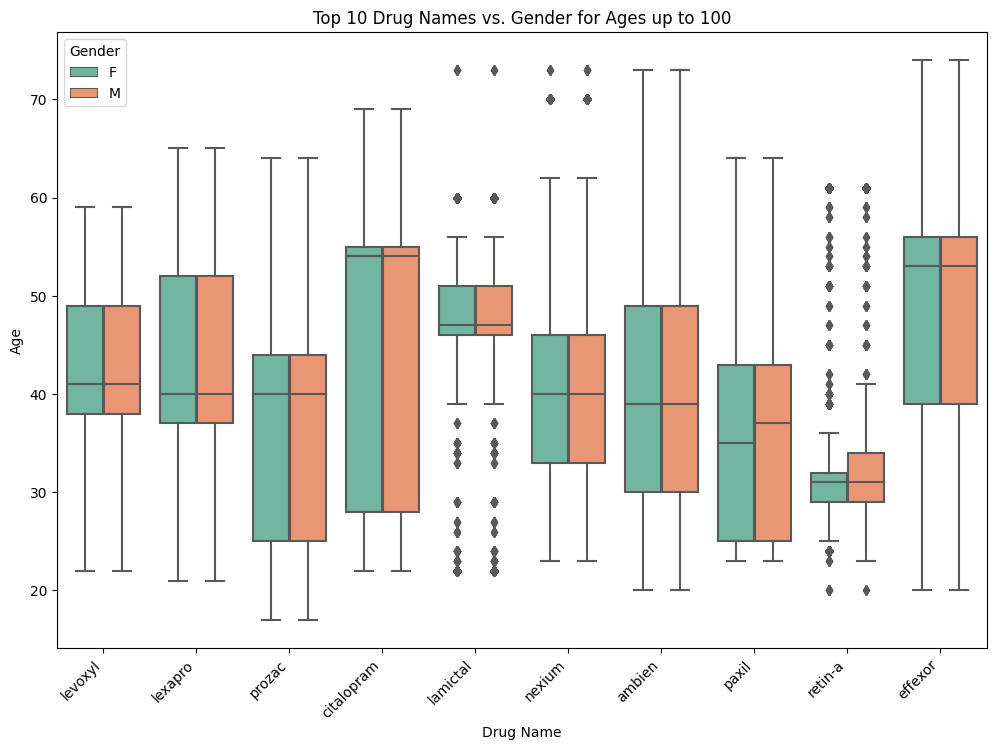

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the 'DRUG NAME', 'GENDER', and 'AGE' columns

# Filter the data to include ages up to 100
filtered_data = data[data['AGE'] <= 100]

# Get the top 10 drug names from the filtered data
top_n = 10
top_drugs = filtered_data['DRUG NAME'].value_counts().head(top_n).index

# Filter the data again to include only the top 10 drug names
filtered_data = filtered_data[filtered_data['DRUG NAME'].isin(top_drugs)]

# Create a box plot for the top 10 drug names vs. gender for ages up to 100
plt.figure(figsize=(12, 8))
sns.boxplot(x='DRUG NAME', y='AGE', hue='GENDER', data=filtered_data, palette='Set2')
plt.xlabel('Drug Name')
plt.ylabel('Age')
plt.title(f'Top {top_n} Drug Names vs. Gender for Ages up to 100')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.show()
   #age vs drug name vs side effect try this

In [115]:
##younger patients are having skin concerns (males are higher than females ), older patients are suffering from depression irrespective of gender

In [116]:
##refer the medicine for depression (first to acute stage and then mention inference)

In [117]:
#age vs top 10 drug name vs race( COULD NOT FIND INFERENCE ON THIS PLOT )

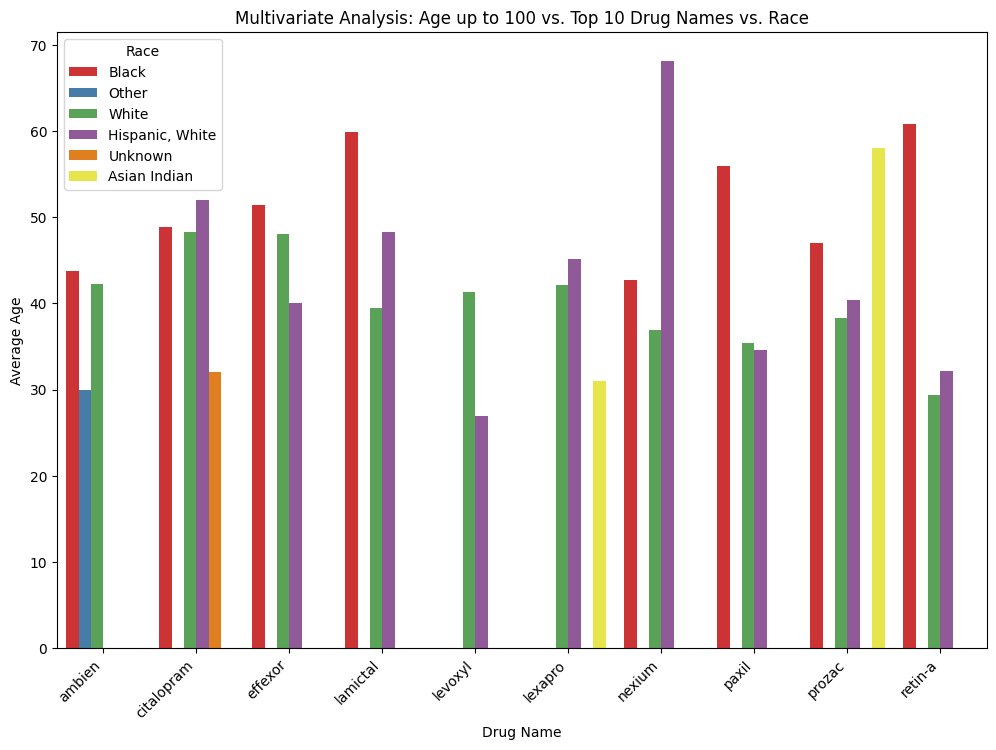

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame containing the 'AGE', 'DRUG NAME', and 'RACE' columns

# Filter the data to include ages up to 100
filtered_data = data[data['AGE'] <= 100]

# Get the top 10 drug names from the filtered data
top_n = 10
top_drugs = filtered_data['DRUG NAME'].value_counts().head(top_n).index

# Filter the data again to include only the top 10 drug names
filtered_data = filtered_data[filtered_data['DRUG NAME'].isin(top_drugs)]

# Calculate the average age for each combination of 'Drug Name' and 'Race'
age_by_drug_race = filtered_data.groupby(['DRUG NAME', 'RACE'])['AGE'].mean().reset_index()

# Create a grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='DRUG NAME', y='AGE', hue='RACE', data=age_by_drug_race, palette='Set1')
plt.title('Multivariate Analysis: Age up to 100 vs. Top 10 Drug Names vs. Race')
plt.xlabel('Drug Name')
plt.ylabel('Average Age')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Race')
plt.show()          #DISCUSS RELEVANCE OF INFERENCE


In [119]:
#BLACKS ABOVE 45 ARE USING 9 OUT OF 10 DRUGS ,30-47 YRS WHITES ARE USING ALL DRUGS ,ASIAN INDIANS ARE USING ONLY 2 DRUGS ,AMBIEN IS USED BY OTHERS ,CITALOPRAM IS USED BY

In [120]:
#age vs side effects vs top 10 drug name(no clear inference)

In [121]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the 'AGE', 'DRUG NAME', and 'SIDE EFFECTS' columns

# Define age bins for three categories: 0-30, 31-60, and 61+
age_bins = [0, 30, 60, 150]  # Adjust the upper limit as needed

# Create labels for the age bins
age_labels = ['0-30', '31-60', '61+']

# Add a new column 'AGE_GROUP' to the DataFrame with age group labels
data['AGE_GROUP'] = pd.cut(data['AGE'], bins=age_bins, labels=age_labels, include_lowest=True)

# Filter the data to include ages up to 100
filtered_data = data[data['AGE'] <= 100]

# Get the top 10 drug names used by people of all age groups
top_n = 10
top_drugs = filtered_data['DRUG NAME'].value_counts().head(top_n).index

# Filter the data to include only the top 10 drug names
filtered_data = filtered_data[filtered_data['DRUG NAME'].isin(top_drugs)]

# Create a contingency table
contingency_table = pd.crosstab([filtered_data['AGE_GROUP'], filtered_data['DRUG NAME']], filtered_data['SIDE EFFECTS'])

# Display the contingency table
contingency_table


SIDE EFFECTS          Extremely Severe Side Effects  Mild Side Effects  \
AGE_GROUP DRUG NAME                                                      
0-30      ambien                                  0                541   
          citalopram                              0                517   
          effexor                               509                 48   
          lamictal                                8                975   
          levoxyl                                 0                 56   
          lexapro                                40               1007   
          nexium                                  0                  0   
          paxil                                  40               1955   
          prozac                                  0               1551   
          retin-a                                 0                 56   
31-60     ambien                                  0                131   
          citalopram                              0               2942   
          effexor                                 8               2588   
          lamictal                                0               3897   
          levoxyl                               947                992   
          lexapro                                96               1322   
          nexium                                  0               1048   
          paxil                                   8               1054   
          prozac                                998               1088   
          retin-a                                 0               1140   
61+       ambien                                  0                 16   
          citalopram                              0                  0   
          effexor                                 0                  8   
          lamictal                                0                  0   
          lexapro                                 0                  0   
          nexium                                  0                  8   
          paxil                                  40                  8   
          prozac                                  0                  0   
          retin-a                                 0                958   

SIDE EFFECTS          Moderate Side Effects  No Side Effects  \
AGE_GROUP DRUG NAME                                            
0-30      ambien                          8              968   
          citalopram                   1012                0   
          effexor                        24               16   
          lamictal                        8               40   
          levoxyl                       964                0   
          lexapro                        32               48   
          nexium                          0             1003   
          paxil                          64               40   
          prozac                         24                0   
          retin-a                       975               32   
31-60     ambien                          8             2003   
          citalopram                     24               40   
          effexor                      1005               40   
          lamictal                        8               96   
          levoxyl                         8             2912   
          lexapro                      1037             1080   
          nexium                         16             2943   
          paxil                          32             1939   
          prozac                        208             1023   
          retin-a                       184               40   
61+       ambien                          0                0   
          citalopram                     24                0   
          effexor                       964                0   
          lamictal                        0                8   
          lexapro                        

In [122]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the 'AGE_GROUP' column

# Use the drop method to remove the 'AGE_GROUP' column
data = data.drop('AGE_GROUP', axis=1)


**PRE PROCESSING**  -***codes after this is available in next file due to large size of the file ***

In [125]:
data.isna().sum()

GENDER           0
DRUG NAME        0
AGE             20
RACE             0
SIDE EFFECTS     0
dtype: int64